In [1]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

# path to json file that stores MFCCs and genre 
# labels for each processed segment
file_path = "extracted_feature_set.json"

def load_dataset(data_path):

    with open(data_path, "r") as fp:
        data = json.load(fp)

    # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    print("Data succesfully loaded!")

    return  X, y

In [4]:
# This function plots the history of the training validation set
# History is the accuracy./loss of the set as a function of the epochs
def output_history(model_history):

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(model_history.history["accuracy"], label="train accuracy")
    axs[0].plot(model_history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(model_history.history["loss"], label="train error")
    axs[1].plot(model_history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

Data succesfully loaded!
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 1690)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               865792    
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_6 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                650       
Total params: 1,014,218
Trainable params: 1,014,218
Non-trainable params: 0
_________________________________________________________________
Train on 6997 samples, validate on 2999 samples
Epoch 1/100
6997/6997 [==============

6997/6997 [==============================] - 2s 324us/sample - loss: 0.7983 - accuracy: 0.9877 - val_loss: 3.3916 - val_accuracy: 0.5925
Epoch 49/100
6997/6997 [==============================] - 2s 320us/sample - loss: 1.3801 - accuracy: 0.8315 - val_loss: 3.1821 - val_accuracy: 0.5919
Epoch 50/100
6997/6997 [==============================] - 2s 329us/sample - loss: 0.9249 - accuracy: 0.9450 - val_loss: 3.1710 - val_accuracy: 0.6039
Epoch 51/100
6997/6997 [==============================] - 2s 321us/sample - loss: 0.8298 - accuracy: 0.9747 - val_loss: 3.0337 - val_accuracy: 0.6139
Epoch 52/100
6997/6997 [==============================] - 2s 347us/sample - loss: 0.7673 - accuracy: 0.9927 - val_loss: 3.0463 - val_accuracy: 0.6175
Epoch 53/100
6997/6997 [==============================] - 2s 333us/sample - loss: 0.7450 - accuracy: 0.9963 - val_loss: 2.9892 - val_accuracy: 0.6232
Epoch 54/100
6997/6997 [==============================] - 2s 328us/sample - loss: 0.7295 - accuracy: 0.9981 - val

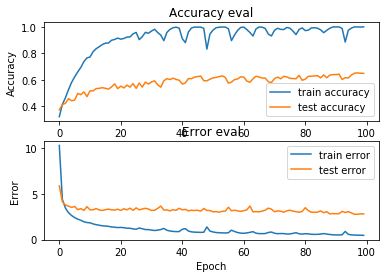

In [5]:
if __name__ == "__main__":

    # load data
    X, y = load_dataset(file_path)

    # create train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    # build network topology
    music_model = keras.Sequential([

        # input layer
        keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),

        # 1st dense layer
        keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),

        # 2nd dense layer
        keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),

        # 3rd dense layer
        keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),

        # output layer
        keras.layers.Dense(10, activation='softmax')
    ])

    # compile model
    optimiser = keras.optimizers.Adam(learning_rate=0.0001)
    music_model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    music_model.summary()

    # train model
    model_history = music_model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=100)
    
    # plot accuracy and error as a function of the epochs
    output_history(model_history)

In [9]:
# evaluate model on training set
train_loss, train_acc = music_model.evaluate(X_train, y_train, verbose=2)
print('\nTest accuracy:', train_acc)

6997/1 - 1s - loss: 0.4805 - accuracy: 0.9987

Test accuracy: 0.99871373


In [10]:
test_loss, test_acc = music_model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

2999/1 - 0s - loss: 2.2325 - accuracy: 0.6482

Test accuracy: 0.64821607
